<a href="https://colab.research.google.com/github/akatjizeu/Data-Science/blob/main/hackathon/hackathon2/hackathon_2A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
!pip install --upgrade scikit-learn xgboost

In [37]:
# If you are missing any libraries, you can install them with pip
# !pip install xgboost

from IPython import get_ipython
from IPython.display import display

import numpy as np
import pandas as pd

# For data visualization (optional)
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and modeling
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# return all numbers to 2 decimal places
pd.options.display.float_format = '{:.2f}'.format


In [38]:
#Load the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
# Load test and train data from google drive
train_df = pd.read_csv('/content/drive/MyDrive/ML_DATASETS/ML_2/Train_set.csv')
test_df = pd.read_csv('/content/drive/MyDrive/ML_DATASETS/ML_2/Test_set.csv')
#

In [40]:
# Quick look at the data
train_df.head()

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,72199369,9000,3 years,9.17,B,B2,<5 Years,OWN,85000.00,Not Verified,...,0.00,0.00,39519,20.00,59.60,INDIVIDUAL,4.00,95493.00,84100.00,0
1,14257956,18000,3 years,13.65,C,C1,<5 Years,OWN,64000.00,Verified,...,0.00,1.00,9783,24.00,3348.25,INDIVIDUAL,95.00,185433.00,13500.00,0
2,66216451,16000,3 years,7.26,A,A4,<5 Years,MORTGAGE,150000.00,Source Verified,...,2.00,0.00,13641,27.00,276.69,INDIVIDUAL,13.00,180519.00,19300.00,0
3,46974169,25000,3 years,13.99,C,C4,NaN,MORTGAGE,59800.00,Verified,...,0.00,0.00,35020,35.00,1106.72,INDIVIDUAL,17.00,183208.00,55400.00,0
4,46725961,17000,3 years,6.39,A,A2,10+ years,MORTGAGE,72000.00,Source Verified,...,0.00,0.00,23990,26.00,725.29,INDIVIDUAL,39.00,23990.00,81300.00,0


In [41]:
# Check for missing values
train_df.isna().sum()

,0
ID,0
loan_amnt,0
loan_term,0
interest_rate,0
loan_grade,0
loan_subgrade,0
job_experience,4702
home_ownership,0
annual_income,1
income_verification_status,0


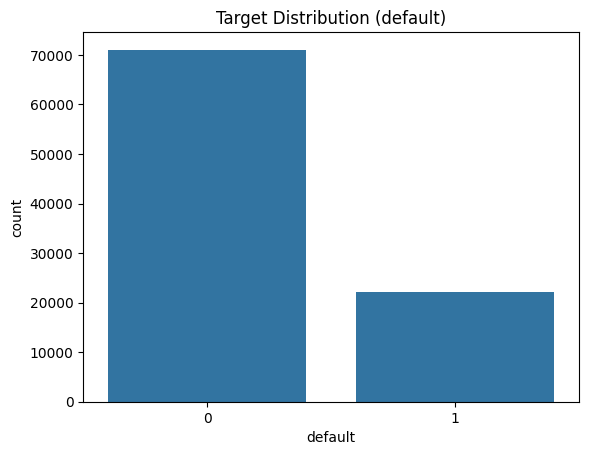

In [42]:
# Distribution of target
sns.countplot(x='default', data=train_df)
plt.title("Target Distribution (default)")
plt.show()

In [43]:
# Basic statistics
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,93174.00,35050211.39,24149262.07,70735.00,10859832.50,37107507.00,58598949.50,73519746.00
loan_amnt,93174.00,14733.86,8428.18,500.00,8000.00,13000.00,20000.00,35000.00
interest_rate,93174.00,13.23,4.37,5.32,9.99,12.99,16.20,28.99
annual_income,93173.00,75028.26,69454.78,1200.00,45000.00,64000.00,90000.00,9500000.00
debt_to_income,93174.00,18.13,8.56,0.00,11.93,17.64,23.89,672.52
delinq_2yrs,93172.00,0.32,0.88,0.00,0.00,0.00,0.00,22.00
public_records,93172.00,0.20,0.58,0.00,0.00,0.00,0.00,49.00
revolving_balance,93174.00,16854.47,23689.07,0.00,6433.00,11856.00,20745.00,2560703.00
total_acc,93172.00,25.25,11.86,1.00,17.00,24.00,32.00,119.00
interest_receive,93174.00,1747.26,2088.24,0.00,439.88,1070.76,2219.61,23172.31


In [44]:
# Example of splitting columns
numeric_features = [
    'loan_amnt', 'interest_rate', 'annual_income', 'debt_to_income',
    'delinq_2yrs', 'public_records', 'revolving_balance', 'total_acc',
    'interest_receive', 'last_week_pay', 'total_current_balance', 'total_revolving_limit'
]

categorical_features = [
    'loan_term', 'loan_grade', 'loan_subgrade', 'job_experience', 'home_ownership',
    'income_verification_status', 'loan_purpose', 'state_code', 'application_type'
]

# The target
target = 'default'


In [45]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])



In [46]:

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [47]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
], remainder='drop')  # drop any column not in numeric_features or categorical_features

In [48]:
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') # Ensure proper initialization



In [49]:
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model)
    ],
    voting='soft'  # 'hard' or 'soft'; 'soft' uses predicted probabilities
)


In [50]:
model_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('voting_clf', ensemble_model)
])


In [51]:
param_grid = {
    # RandomForest parameters
    'voting_clf__rf__n_estimators': [100, 200],
    'voting_clf__rf__max_depth': [5, 10, 15],
    'voting_clf__rf__min_samples_split': [2, 5],

    # XGB parameters
    'voting_clf__xgb__n_estimators': [100, 200],
    'voting_clf__xgb__max_depth': [3, 6, 10],
    'voting_clf__xgb__learning_rate': [0.01, 0.1, 0.2],
}


In [52]:
X = train_df[numeric_features + categorical_features]
y = train_df[target]

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.2,
                                                  random_state=42,
                                                  stratify=y)


In [53]:
random_search = RandomizedSearchCV(
    estimator=model_pipeline,
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=3,                # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)




In [54]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


ValueError: 
All the 30 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_voting.py", line 419, in fit
    return super().fit(X, transformed_y, **fit_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_voting.py", line 81, in fit
    names, clfs = self._validate_estimators()
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py", line 233, in _validate_estimators
    if est != "drop" and not is_estimator_type(est):
                             ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1237, in is_classifier
    return get_tags(estimator).estimator_type == "classifier"
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py", line 430, in get_tags
    sklearn_tags_provider[klass] = klass.__sklearn_tags__(estimator)  # type: ignore[attr-defined]
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 540, in __sklearn_tags__
    tags = super().__sklearn_tags__()
           ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'super' object has no attribute '__sklearn_tags__'
